### Import the necessary libraries

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline

from scipy import stats

### Upload data for may 2016

In [3]:
data = pd.read_csv('yellow_tripdata_2016-05.csv')

In [4]:
data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2016-05-01 00:00:00,2016-05-01 00:17:31,1,3.60,-73.985901,40.768040,1,N,-73.983986,40.730099,1,15.0,0.5,0.5,1.50,0.0,0.3,17.80
1,2,2016-05-01 00:00:00,2016-05-01 00:07:31,1,1.68,-73.991577,40.744751,1,N,-73.975700,40.765469,1,7.5,0.5,0.5,0.88,0.0,0.3,9.68
2,2,2016-05-01 00:00:00,2016-05-01 00:07:01,6,1.09,-73.993073,40.741573,1,N,-73.980995,40.744633,1,6.5,0.5,0.5,1.56,0.0,0.3,9.36
3,2,2016-05-01 00:00:00,2016-05-01 00:19:47,1,4.21,-73.991943,40.684601,1,N,-74.002258,40.733002,1,17.0,0.5,0.5,3.66,0.0,0.3,21.96
4,2,2016-05-01 00:00:00,2016-05-01 00:06:39,1,0.56,-74.005280,40.740192,1,N,-73.997498,40.737564,1,6.0,0.5,0.5,1.46,0.0,0.3,8.76


### Filtering data

In [20]:
data_filtered = data[(data.tpep_pickup_datetime != data.tpep_dropoff_datetime) &
                     (data.trip_distance != 0.) & (data.passenger_count != 0.) &
                    (data.pickup_longitude <= -73.70001) & (data.pickup_longitude >= -74.25559) &
                    (data.pickup_latitude <= 40.91553) & (data.pickup_latitude >= 40.49612)]

In [21]:
data_filtered

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2016-05-01 00:00:00,2016-05-01 00:17:31,1,3.60,-73.985901,40.768040,1,N,-73.983986,40.730099,1,15.0,0.5,0.5,1.50,0.0,0.3,17.80
1,2,2016-05-01 00:00:00,2016-05-01 00:07:31,1,1.68,-73.991577,40.744751,1,N,-73.975700,40.765469,1,7.5,0.5,0.5,0.88,0.0,0.3,9.68
2,2,2016-05-01 00:00:00,2016-05-01 00:07:01,6,1.09,-73.993073,40.741573,1,N,-73.980995,40.744633,1,6.5,0.5,0.5,1.56,0.0,0.3,9.36
3,2,2016-05-01 00:00:00,2016-05-01 00:19:47,1,4.21,-73.991943,40.684601,1,N,-74.002258,40.733002,1,17.0,0.5,0.5,3.66,0.0,0.3,21.96
4,2,2016-05-01 00:00:00,2016-05-01 00:06:39,1,0.56,-74.005280,40.740192,1,N,-73.997498,40.737564,1,6.0,0.5,0.5,1.46,0.0,0.3,8.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11836837,2,2016-05-31 23:53:01,2016-06-01 00:00:24,2,1.89,-73.947876,40.774818,1,N,-73.974274,40.779797,1,8.0,0.5,0.5,1.86,0.0,0.3,11.16
11836838,2,2016-05-31 23:53:02,2016-06-01 00:19:36,1,15.21,-73.789467,40.646942,1,N,-73.893929,40.731426,1,42.0,0.5,0.5,8.66,0.0,0.3,51.96
11836839,2,2016-05-31 23:53:02,2016-05-31 23:59:07,1,1.80,-74.008659,40.719723,1,N,-73.999580,40.743649,1,7.5,0.5,0.5,1.76,0.0,0.3,10.56
11836840,2,2016-05-31 23:53:03,2016-06-01 00:05:47,1,2.28,-73.981644,40.758862,1,N,-73.952637,40.766491,1,11.0,0.5,0.5,2.46,0.0,0.3,14.76


### Aggregate data for may 2016 by hour and region

**The cell identifiers**

In [27]:
regions = pd.read_csv('regions.csv', sep=';')
regions

,region,west,east,south,north
0,1,-74.255590,-74.244478,40.496120,40.504508
1,2,-74.255590,-74.244478,40.504508,40.512896
2,3,-74.255590,-74.244478,40.512896,40.521285
3,4,-74.255590,-74.244478,40.521285,40.529673
4,5,-74.255590,-74.244478,40.529673,40.538061
...,...,...,...,...,...
2495,2496,-73.711122,-73.700010,40.873589,40.881977
2496,2497,-73.711122,-73.700010,40.881977,40.890365
2497,2498,-73.711122,-73.700010,40.890365,40.898754
2498,2499,-73.711122,-73.700010,40.898754,40.907142


**Function get identifier of region**

In [269]:
def get_region(lat, lon):
    lons = [-74.255590, -73.700010]
    lats = [40.496120, 40.915530]
    d_lon = (lons[1] - lons[0])/50
    d_lat = (lats[1] - lats[0])/50
    return int(((lon-lons[0])//d_lon)*50 + (lat-lats[0])//d_lat + 1)

**Check the region is numbered correctly**

In [404]:
region_check = []
for west, east, south, north in zip(regions.west, regions.east, regions.south, regions.north):
    lon_mid = (west + east)/2
    lat_mid = (south + north)/2
    region_check.append(get_region(lat_mid, lon_mid))

In [405]:
regions['region_check'] = region_check
regions

,region,west,east,south,north,region_check
0,1,-74.255590,-74.244478,40.496120,40.504508,1
1,2,-74.255590,-74.244478,40.504508,40.512896,2
2,3,-74.255590,-74.244478,40.512896,40.521285,3
3,4,-74.255590,-74.244478,40.521285,40.529673,4
4,5,-74.255590,-74.244478,40.529673,40.538061,5
...,...,...,...,...,...,...
2495,2496,-73.711122,-73.700010,40.873589,40.881977,2496
2496,2497,-73.711122,-73.700010,40.881977,40.890365,2497
2497,2498,-73.711122,-73.700010,40.890365,40.898754,2498
2498,2499,-73.711122,-73.700010,40.898754,40.907142,2499


In [414]:
print((regions.region.values - regions.region_check.values).sum())

0


**Add identifier of region in dataset**

In [190]:
region = []

for lon, lat in zip(data_filtered.pickup_longitude, data_filtered.pickup_latitude):
    region.append(get_region(lat, lon))

In [196]:
data_filtered['region'] = region

C:\Users\roy_d\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [197]:
data_filtered

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,region
0,1,2016-05-01 00:00:00,2016-05-01 00:17:31,1,3.60,-73.985901,40.768040,1,N,-73.983986,40.730099,1,15.0,0.5,0.5,1.50,0.0,0.3,17.80,1233
1,2,2016-05-01 00:00:00,2016-05-01 00:07:31,1,1.68,-73.991577,40.744751,1,N,-73.975700,40.765469,1,7.5,0.5,0.5,0.88,0.0,0.3,9.68,1180
2,2,2016-05-01 00:00:00,2016-05-01 00:07:01,6,1.09,-73.993073,40.741573,1,N,-73.980995,40.744633,1,6.5,0.5,0.5,1.56,0.0,0.3,9.36,1180
3,2,2016-05-01 00:00:00,2016-05-01 00:19:47,1,4.21,-73.991943,40.684601,1,N,-74.002258,40.733002,1,17.0,0.5,0.5,3.66,0.0,0.3,21.96,1173
4,2,2016-05-01 00:00:00,2016-05-01 00:06:39,1,0.56,-74.005280,40.740192,1,N,-73.997498,40.737564,1,6.0,0.5,0.5,1.46,0.0,0.3,8.76,1130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11836837,2,2016-05-31 23:53:01,2016-06-01 00:00:24,2,1.89,-73.947876,40.774818,1,N,-73.974274,40.779797,1,8.0,0.5,0.5,1.86,0.0,0.3,11.16,1384
11836838,2,2016-05-31 23:53:02,2016-06-01 00:19:36,1,15.21,-73.789467,40.646942,1,N,-73.893929,40.731426,1,42.0,0.5,0.5,8.66,0.0,0.3,51.96,2068
11836839,2,2016-05-31 23:53:02,2016-05-31 23:59:07,1,1.80,-74.008659,40.719723,1,N,-73.999580,40.743649,1,7.5,0.5,0.5,1.76,0.0,0.3,10.56,1127
11836840,2,2016-05-31 23:53:03,2016-06-01 00:05:47,1,2.28,-73.981644,40.758862,1,N,-73.952637,40.766491,1,11.0,0.5,0.5,2.46,0.0,0.3,14.76,1232


**Cover to datetime**

In [252]:
times = pd.to_datetime(data_filtered.tpep_pickup_datetime, )
time = times[1]
print(time.year,
time.month,
time.day,
time.hour,
time.minute,
time.second)

2016 5 1 0 0 0


**Make Aggregate table**

In [431]:
dt_agg = pd.DataFrame({'year':times.dt.year, 'month':times.dt.month, 'day':times.dt.day, 'hour':times.dt.hour,\
                       'Region':region})

In [454]:
timehour = pd.to_datetime(dt_agg[['year', 'month', 'day', 'hour']])

In [455]:
dt_agg['timehour'] = timehour

In [457]:
dt_agg.head()

,year,month,day,hour,Region,timehour
0,2016,5,1,0,1233,2016-05-01
1,2016,5,1,0,1180,2016-05-01
2,2016,5,1,0,1180,2016-05-01
3,2016,5,1,0,1173,2016-05-01
4,2016,5,1,0,1130,2016-05-01


### Print the first rows of the resulting table the time, zone ID, and number of trips

In [440]:
data_agg = dt_agg[['Region', 'timehour']].groupby(['timehour', 'Region']).size().reset_index(name='count')

In [441]:
data_agg

,timehour,Region,count
0,2016-05-01 00:00:00,1015,1
1,2016-05-01 00:00:00,1017,1
2,2016-05-01 00:00:00,1029,3
3,2016-05-01 00:00:00,1030,1
4,2016-05-01 00:00:00,1033,4
...,...,...,...
141757,2016-05-31 23:00:00,2069,17
141758,2016-05-31 23:00:00,2070,1
141759,2016-05-31 23:00:00,2118,192
141760,2016-05-31 23:00:00,2119,77


**Save result to file csv**

In [442]:
data_agg.to_csv('data_agg.csv')

### Plot the number of yellow taxi rides from the cell containing the Empire State Building

**Get region of the Empire State Building**

In [271]:
lat_ESB = 40.748433 # longitude and latitude of the Empire State Building
lon_ESB = -73.985656
region_ESB = get_region(lat_ESB, lon_ESB)
print(region_ESB)

1231


**Create a table of trip data for the Empire state building region**

In [443]:
data_ESB = data_agg[data_agg.Region==region_ESB]

In [444]:
data_ESB

,timehour,Region,count
50,2016-05-01 00:00:00,1231,881
274,2016-05-01 01:00:00,1231,713
502,2016-05-01 02:00:00,1231,533
714,2016-05-01 03:00:00,1231,418
921,2016-05-01 04:00:00,1231,353
...,...,...,...
140880,2016-05-31 19:00:00,1231,1094
141050,2016-05-31 20:00:00,1231,997
141235,2016-05-31 21:00:00,1231,1099
141418,2016-05-31 22:00:00,1231,874


**Plot the number of yellow taxi rides from the cell containing the Empire State Building**

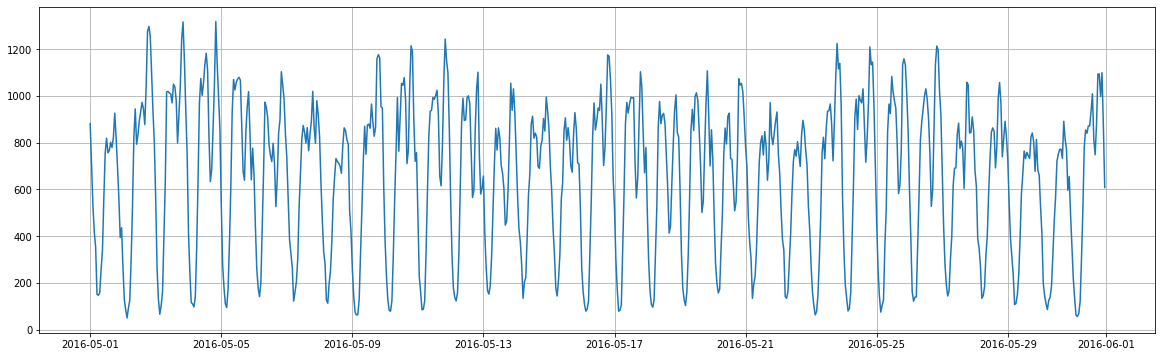

In [448]:
plt.figure(figsize=(20,6))
plt.plot(data_ESB.timehour, data_ESB['count'])
plt.grid()

### The number of hour-cell pairs in may 2016 for which no trips were made

In [453]:
n_notrips = 2500*24*31 - len(data_agg) # we have 2500 regions, 24 hours for one day and 31 days in month
print('Pars hour-sell with no trips: ', n_notrips)

Pars hour-sell with no trips:  1718238
